## Importing Libraries

In [309]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [311]:
df = pd.read_csv('credit_risk_dataset.csv')

## Summary of the dataset

In [313]:
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [314]:
print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [315]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


## Checking Missing values and duplicates

In [317]:
dp = df.duplicated().sum() # dp-duplicate
print(f"\nDuplicated rows : {dp}")

msv = df.isnull().sum() # msv-missing values
print("\nMissing Values in the columns:\n", msv)


Duplicated rows : 165

Missing Values in the columns:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


## Handling of the missing values and duplicates

In [319]:
df = df.dropna()  # Drop rows with missing values
print("\nDataset after dropping missing values:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB

Dataset after dropping missing valu

In [320]:
msv = df.isnull().sum() # msv-missing values
print("\nMissing Values in the columns:\n", msv)


Missing Values in the columns:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [321]:
# Drop duplicate rows
df = df.drop_duplicates()

In [322]:
dp = df.duplicated().sum() # dp-duplicate
print(f"\nDuplicated rows : {dp}")



Duplicated rows : 0


## Exploratory Data Analysis

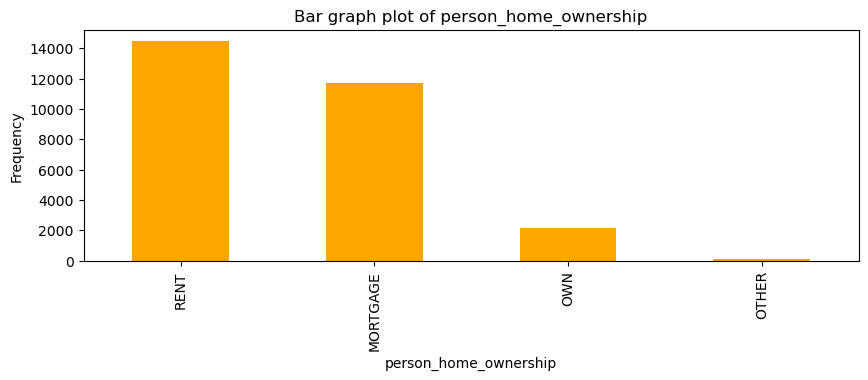

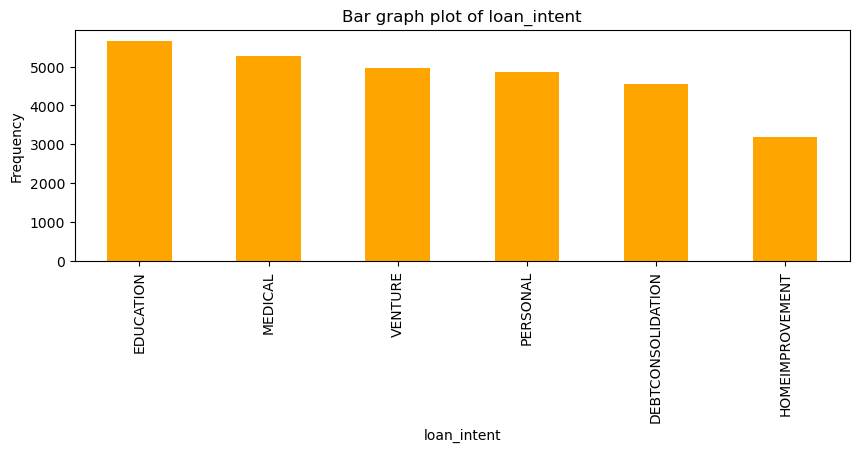

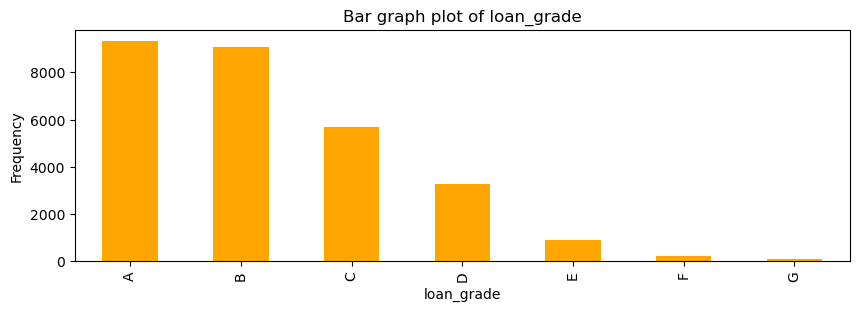

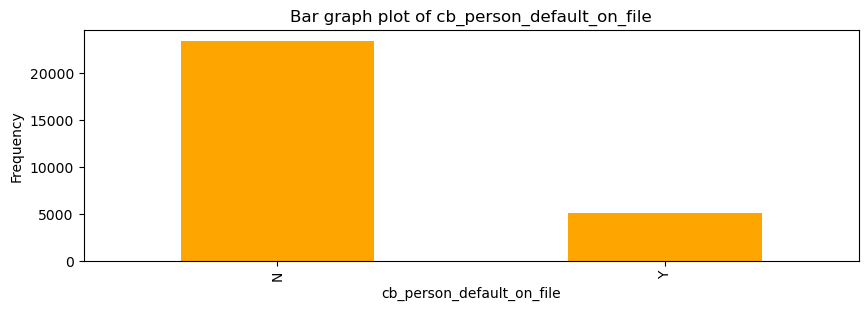

In [324]:
# Plotting Bar graphs for the categorical data columns
catg_cols = df.select_dtypes(include=['object']).columns
for col in catg_cols:
    df[col].value_counts().plot(kind='bar', figsize=(10, 3), color='orange')
    plt.title(f"Bar graph plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

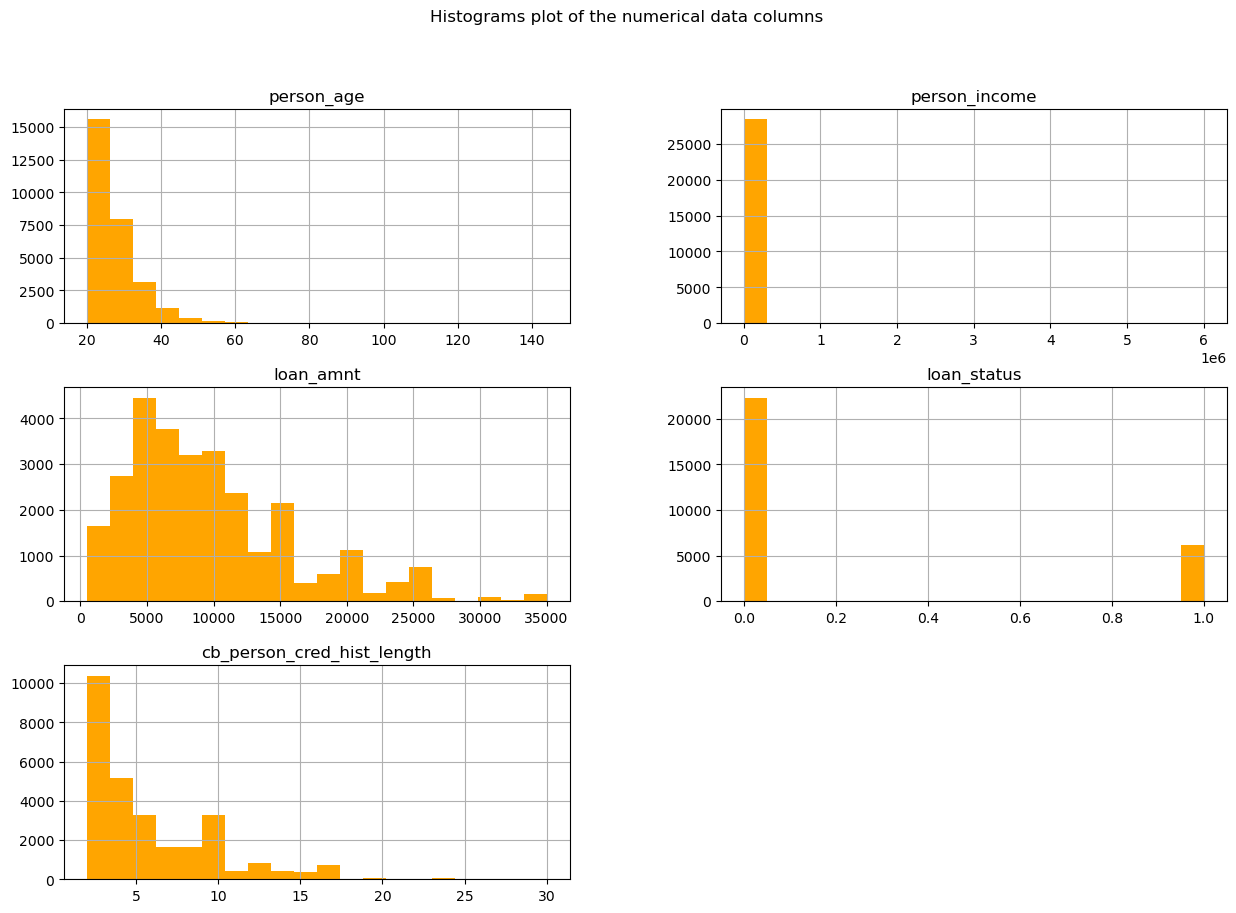

In [325]:
# Plotting Histogram for the numerical data columns

num_cols = df.select_dtypes(include=['int64']).columns
df[num_cols].hist(bins=20, figsize=(15, 10), color='orange')
plt.suptitle("Histograms plot of the numerical data columns")
plt.show()

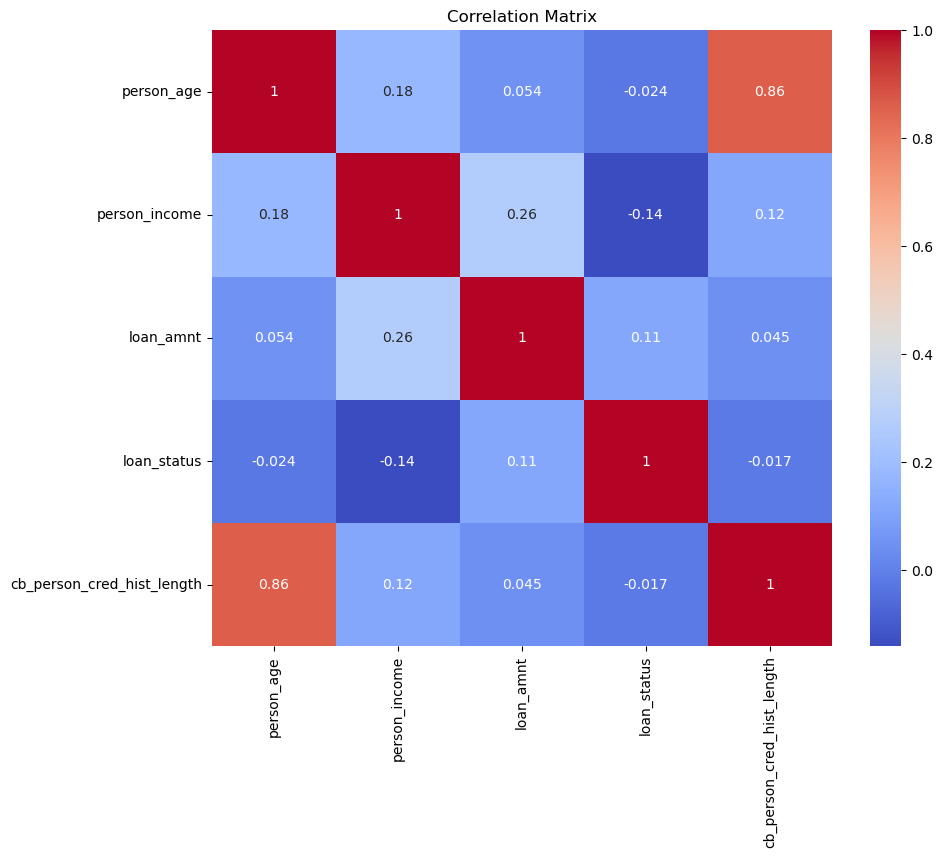

In [326]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_mtx = df[num_cols].corr()
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Encoding categorical variables

In [328]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Define features (target) and target variable (predictors)

In [330]:
target = 'loan_status'
predictors = [col for col in df.columns if col != target]

##  Standardize numerical features

In [332]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Splitting the Dataset

In [334]:
X = df[predictors]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

## Logistic Regression Model

In [337]:
# Train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8421329591299772
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      4441
           1       0.74      0.44      0.55      1260

    accuracy                           0.84      5701
   macro avg       0.80      0.70      0.73      5701
weighted avg       0.83      0.84      0.83      5701



## Random Forest Model

In [339]:
# Using advanced algorithms like Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Train 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.928433608138923
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4441
           1       0.97      0.70      0.81      1260

    accuracy                           0.93      5701
   macro avg       0.94      0.85      0.88      5701
weighted avg       0.93      0.93      0.92      5701



## Gradient Boosting Regressor

In [341]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gbc_model = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gbc_model.fit(X_train, y_train)
 
# Predict on test set
pred_y = gbc_model.predict(X_test)
 
# Evaluate model
print("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, pred_y))
print("Classification Report:\n", classification_report(y_test, pred_y))

Gradient Boosting Classifier accuracy: 0.9226451499736888
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4441
           1       0.95      0.69      0.80      1260

    accuracy                           0.92      5701
   macro avg       0.93      0.84      0.87      5701
weighted avg       0.92      0.92      0.92      5701



## Confusion Matrix

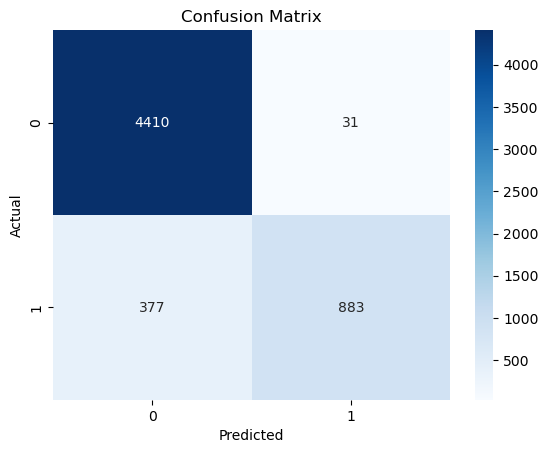

In [343]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## roc_auc_score

In [396]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
gbc_auc = roc_auc_score(y_test, gbc_model.predict_proba(X_test)[:, 1])

print("Logistic Regression AUC:", log_auc)
print("Random Forest AUC:", rf_auc)
print("Gradient Boosting Classifier AUC:", gbc_auc)

Logistic Regression AUC: 0.8490821458058567
Random Forest AUC: 0.927725594478578
Gradient Boosting Classifier AUC: 0.9252569848775658


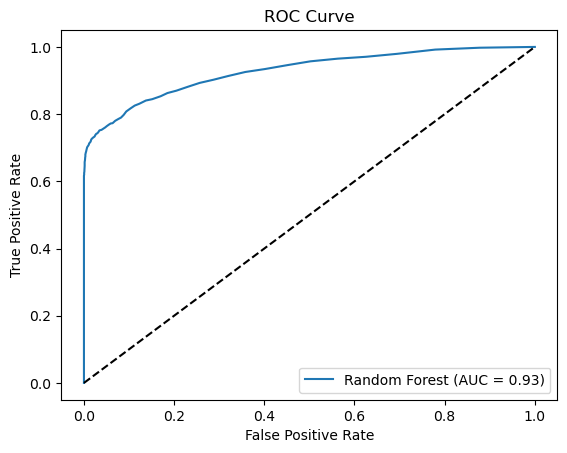

In [345]:
## ROC-AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Calibration

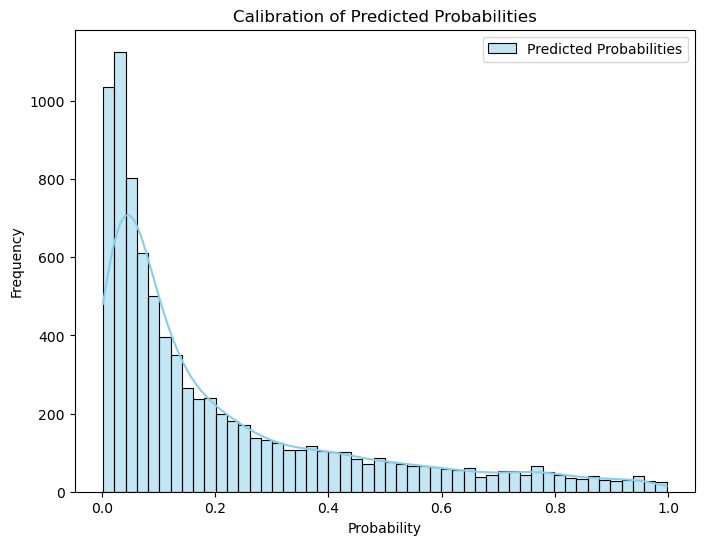

In [347]:
# Visualize probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, bins=50, kde=True, color='skyblue', label='Predicted Probabilities')
plt.title('Calibration of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Feature Importance

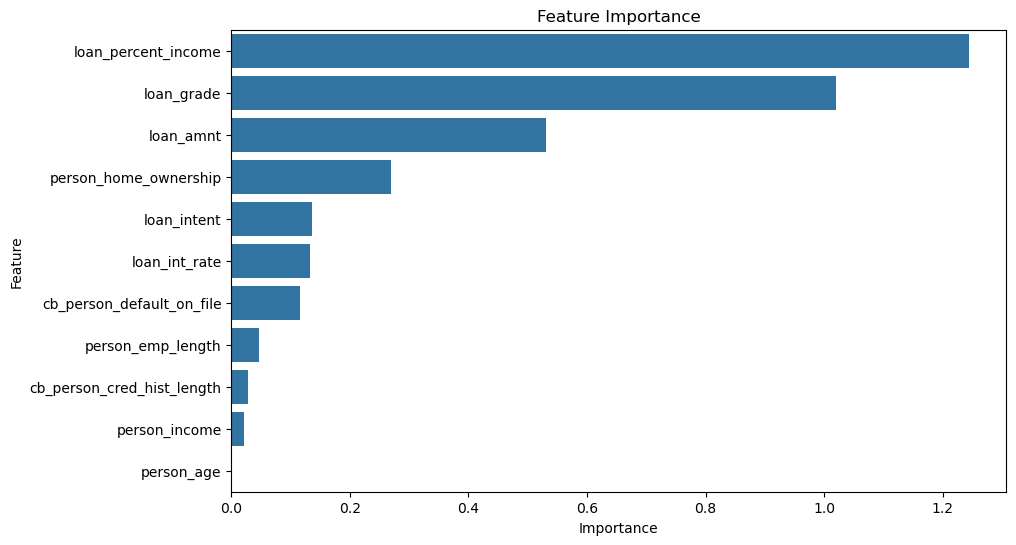


Feature Importance Ranking:
loan_percent_income           0.223644
person_income                 0.142456
loan_int_rate                 0.123721
loan_grade                    0.111210
person_home_ownership         0.099139
loan_intent                   0.074054
loan_amnt                     0.072159
person_emp_length             0.064258
person_age                    0.044026
cb_person_cred_hist_length    0.035012
cb_person_default_on_file     0.010320
dtype: float64


In [391]:

# Step 11: Periodic Monitoring
# Plot feature importance
coefficients = pd.DataFrame({'Feature': predictors, 'Coefficient': model.coef_[0]})
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()


print("\nFeature Importance Ranking:")
print(feature_importances.sort_values(ascending=False))

# Credit Risk Project Analysis and Recommendations

## 1. Logistic Regression: Strong Baseline for Risk Prediction
- **Accuracy:** The model achieved **84.21%**, which means it correctly identifies creditworthiness in 4 out of 5 cases.
- **Strengths:**
  - **Customer Retention:** With a recall of **96%** for low-risk customers, the model ensures nearly all reliable borrowers are retained, a key factor in maintaining revenue streams and customer trust.
  - **Opportunities for Improvement:** The recall for high-risk customers is **44%**, suggesting the model misses more than half of risky cases. Enhancing this with more advanced models can significantly reduce credit risk.

**Recommendation:** Use logistic regression as a baseline tool for quick decision-making, while complementing it with more advanced models for nuanced insights.

---

## 2. Random Forest: Leading in Risk Mitigation and Customer Retention
- **Accuracy:** At **92.84%**, this model represents an **8.63% improvement over logistic regression** in correctly predicting creditworthiness.
- **Customer Retention:**
  - **Recall for Low-Risk Customers (99%):** This is a **3.13% increase** over logistic regression, ensuring virtually all dependable borrowers are retained.
- **Risk Mitigation:**
  - **Recall for High-Risk Customers (70%):** This is a **59.09% increase** compared to logistic regression, significantly reducing the likelihood of defaults.
  - **Precision for High-Risk Customers (97%):** Indicates that nearly all flagged risky borrowers are truly high-risk, further minimizing unnecessary losses.

**Recommendation:** Leverage Random Forest as the primary model for operational credit risk management, given its superior balance between customer retention and risk mitigation.

---

## 3. Gradient Boosting: Balanced and Effective
- **Accuracy:** At **92.26%**, Gradient Boosting represents a **7.59% improvement over logistic regression** and performs on par with Random Forest.
- **Customer Retention:**
  - **Recall for Low-Risk Customers (99%):** This matches Random Forest and represents a **3.13% improvement** over logistic regression.
- **Risk Mitigation:**
  - **Recall for High-Risk Customers (69%):** This is a **56.82% increase** over logistic regression, effectively identifying most risky customers.
  - **Precision for High-Risk Customers (95%):** Indicates slightly more false positives than Random Forest but still performs exceptionally well in minimizing risk.

**Recommendation:** Use Gradient Boosting in scenarios requiring flexibility and balance between risk identification and customer inclusivity.

---

## Overall Business Recommendations
1. **Increased Customer Retention by 3.13%:** Both Random Forest and Gradient Boosting models significantly improve the ability to retain low-risk customers compared to logistic regression, which is crucial for revenue stability and customer satisfaction.
2. **Reduced Credit Risk by up to 59.09%:** The recall for high-risk customers dramatically improves with Random Forest and Gradient Boosting, providing robust protection against potential defaults.
3. **Strategic Deployment:** 
   - Use **Logistic Regression** for cost-efficient, interpretable solutions in low-complexity scenarios.
   - Adopt **Random Forest** for high-stakes decisions where risk mitigation is a priority.
   - Employ **Gradient Boosting** for scenarios requiring a fine balance between customer retention and risk management.

---


